In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import sys
from tqdm import tqdm
import matplotlib.colors as colors
from utilities.circuit_basics import *
from utilities.misc import dict_to_json
from utilities.variational import VQE
from utilities.evaluator import Evaluator


bond=1.5
problem_config_load = {"problem" : "H4", "geometry": str([('H', (0., 0., 0.)), ('H', (0., 0., bond)), ('H', (0., 0., 2*bond)), ('H', (0., 0., 3*bond))]).replace('\'',""), "multiplicity":1, "charge":0, "basis":"sto-3g"}
problem_config = {"problem" : "H4", "geometry": [('H', (0., 0., 0.)), ('H', (0., 0., bond)), ('H', (0., 0., 2*bond)), ('H', (0., 0., 3*bond))], "multiplicity":1, "charge":0, "basis":"sto-3g"}
vqe_handler = VQE(n_qubits=args["n_qubits"],problem_config=args["problem_config"])


In [2]:
args={"n_qubits":8,"problem_config":problem_config, "load_displaying":False,}
argsload={"n_qubits":8,"problem_config":problem_config_load, "load_displaying":False,}

vqe_handler = VQE(n_qubits=args["n_qubits"],problem_config=args["problem_config"])

evaluator = Evaluator(argsload,loading=True, path="../data-vans/")


In [4]:
uni, en, indices,resolver, bestfound,lowerbond=evaluator.evolution[evaluator.get_best_iteration()]

In [91]:
vqe_handler2 = VQE(n_qubits=args["n_qubits"],problem_config=args["problem_config"], optimizer="sgd",lr=1e-3)
trisgd=vqe_handler.vqe(indices, symbols_to_values=resolver)

In [76]:
vqe_handler2 = VQE(n_qubits=args["n_qubits"],problem_config=args["problem_config"], optimizer="adagrad")
triadagrad=vqe_handler.vqe(indices)

In [96]:
vqe_handler2 = VQE(n_qubits=args["n_qubits"],problem_config=args["problem_config"], optimizer="adam", lr=1e-3)
triadam=vqe_handler.vqe(indices,symbols_to_values=resolver)

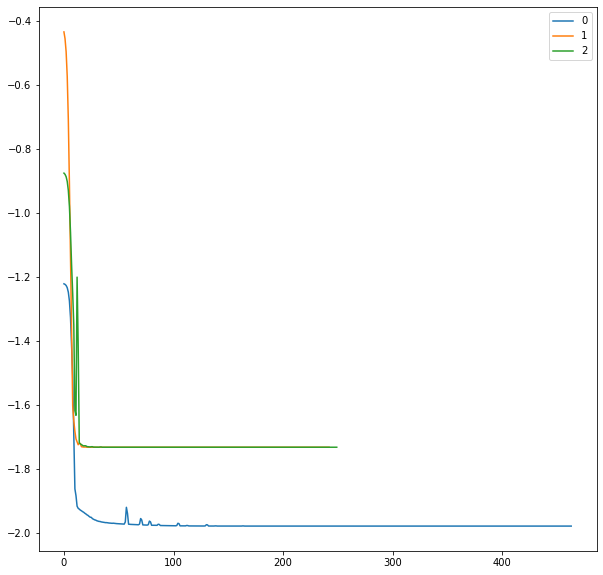

In [81]:
plt.figure(figsize=(10,10))
for ind,hist in enumerate([trisgd, triadagrad, triadam]):
    plt.plot(hist[2].history["energy"],label=str(ind))
plt.legend()

In [16]:
vqe_handler2 = VQE(n_qubits=args["n_qubits"],problem_config=args["problem_config"], optimizer="adam",lr=1e-4)
admito=vqe_handler.vqe(indices)

In [17]:
admito[0]

<tf.Tensor: shape=(), dtype=float32, numpy=-1.9786258>

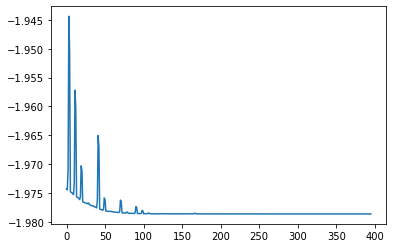

In [18]:
plt.plot(admito[-1].history["energy"][150:])

In [24]:
vqe_handler2 = VQE(n_qubits=args["n_qubits"],problem_config=args["problem_config"], optimizer="adam",lr=1e-5)
ad1=vqe_handler.vqe(indices,symbols_to_values=resolver)

In [25]:
ssg[0]

<tf.Tensor: shape=(), dtype=float32, numpy=-1.9786257>

In [97]:
triadam[0]

<tf.Tensor: shape=(), dtype=float32, numpy=-1.9786257>

In [100]:
accuend

-1.9961503255188067

In [84]:
triadam[0]

<tf.Tensor: shape=(), dtype=float32, numpy=-1.9786241>

In [85]:
trisgd[0]

<tf.Tensor: shape=(), dtype=float32, numpy=-1.9786248>

In [74]:
triadagrad[0]

<tf.Tensor: shape=(), dtype=float32, numpy=-1.7319632>